# 1) Preparación previa

### Carga de librerías

In [1]:
import ipyleaflet
import mpu
import pandas as pd
import re
import numpy as np
from ipyleaflet import Map, basemaps, Marker, AwesomeIcon, Icon, FullScreenControl
import seaborn as sns
import matplotlib.pyplot as plt

### Funciones a usar luego

In [2]:
# La siguiente función nos permite definir la distancia en latitud y longitud respecto de los puentes:
def distancia(lat, long):
    aux = []
    for index, row in puentes_pilar.iterrows():
        aux.append(
            mpu.haversine_distance(
                (row['Latitud'], row['Longitud']), 
                (lat, long)
            )
        )
    return min(aux)

# La siguiente función nos permite aplicar íconos a los marcadores según su quantil:
def marca_propiedad(lat, long, quantile):
    if quantile == 0:
        icono_prop = icon0
    elif quantile == 1:
        icono_prop = icon1
    elif quantile == 2:
        icono_prop = icon2  
    else: 
        icono_prop = icon3
    marker = Marker(location=(lat,long), draggable=False, icon=icono_prop)
    basic_map.add_layer(marker)

### Lectura del dataset limpiado en la notebook de análisis

In [3]:
data = pd.read_csv('DF_Final.csv')
data.head()

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
0,PH,-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,Argentina,Capital Federal,Mataderos,NaN,NaN,NaN,17.6445,55.0,1127.272727
1,apartment,-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,Argentina,Capital Federal,Mataderos,NaN,NaN,NaN,17.6445,55.0,1309.090909
2,apartment,-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,NaN,NaN,17.6445,35.0,1828.571429
3,PH,-34.532957,-58.521782,130000.0,USD,2293785.0,130000.0,106.0,78.0,1226.415094,1666.666667,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro,NaN,NaN,17.6445,106.0,1226.415094
4,apartment,-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,17.6445,45.0,3066.666667


### Filtro del DF

In [4]:
# Máscara para obtener los pertenecientes a Pilar
mascara_pilar = data.Partido == 'Pilar'
df_solo_pilar = data.loc[mascara_pilar, :]
df_solo_pilar.head()

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
15,apartment,NaN,NaN,82000.0,USD,1446849.0,82000.0,48.0,42.0,1708.333333,1952.380952,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,48.0,1708.333333
19,house,-34.479486,-58.984541,650000.0,USD,11468925.0,650000.0,425.0,425.0,1529.411765,1529.411765,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Estancias del Pilar,NaN,NaN,17.6445,425.0,1529.411765
22,house,-34.453857,-58.840181,178000.0,USD,3140721.0,178000.0,150.0,150.0,1186.666667,1186.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,150.0,1186.666667
28,house,-34.463098,-58.902199,400000.0,USD,7057800.0,400000.0,400.0,400.0,1000.000000,1000.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,400.0,1000.000000
31,house,-34.477862,-58.909167,128000.0,USD,2258496.0,128000.0,120.0,120.0,1066.666667,1066.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,120.0,1066.666667


In [5]:
# Máscara para obtener las viviendas que no son countries
pilar_partido = df_solo_pilar.isin({'Barrios':['Pilar', 'Del Viso', 'Derqui', 'Villa Rosa', 'Villa Stolfi', 'Manuel Alberti', 'Manzanares'] })
pilar_sincountry = df_solo_pilar[pilar_partido['Barrios']]
pilar_sincountry.head()

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
15,apartment,NaN,NaN,82000.0,USD,1446849.0,82000.0,48.0,42.0,1708.333333,1952.380952,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,48.0,1708.333333
28,house,-34.463098,-58.902199,400000.0,USD,7057800.0,400000.0,400.0,400.0,1000.000000,1000.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,400.0,1000.000000
32,apartment,-34.444743,-58.795248,120000.0,USD,2117340.0,120000.0,138.0,74.0,869.565217,1621.621622,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Del Viso,NaN,NaN,17.6445,138.0,869.565217
35,house,-34.451624,-58.916545,320000.0,USD,5646240.0,320000.0,209.0,209.0,1531.100478,1531.100478,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,209.0,1531.100478
36,apartment,-34.464913,-58.859600,47000.0,USD,829291.5,47000.0,30.0,30.0,1566.666667,1566.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,30.0,1566.666667


In [6]:
# Máscara para obtener las viviendas que son countries
pilar_country = df_solo_pilar[~pilar_partido ['Barrios']]
pilar_country.head()

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
19,house,-34.479486,-58.984541,650000.0,USD,11468925.0,650000.0,425.0,425.0,1529.411765,1529.411765,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Estancias del Pilar,NaN,NaN,17.6445,425.0,1529.411765
22,house,-34.453857,-58.840181,178000.0,USD,3140721.0,178000.0,150.0,150.0,1186.666667,1186.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,150.0,1186.666667
31,house,-34.477862,-58.909167,128000.0,USD,2258496.0,128000.0,120.0,120.0,1066.666667,1066.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,120.0,1066.666667
33,house,NaN,NaN,74000.0,USD,1305693.0,74000.0,47.0,47.0,1574.468085,1574.468085,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,47.0,1574.468085
34,apartment,-34.439434,-58.798703,79000.0,USD,1393915.5,79000.0,32.0,32.0,2468.750000,2468.750000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,32.0,2468.750000


In [7]:
# Máscara para eliminar valores menores a 1
precio_pilar_sin_country = pilar_sincountry['price_aprox_usd'] > 0 # or np.isNan
df_ppsc = pilar_sincountry.loc[precio_pilar_sin_country, :]
# Verificación de valores NaN -> ppsc = partido pilar sin country
df_ppsc.sort_values(by = 'price_aprox_usd', ascending = False)

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
30846,store,-34.457951,-58.914788,3500000.0,USD,61755750.00,3500000.00,1820.0,1820.0,1923.076923,1923.076923,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,1820.0,1923.076923
44869,store,NaN,NaN,3400000.0,USD,59991300.00,3400000.00,2200.0,2200.0,1545.454545,1545.454545,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,2200.0,1545.454545
36302,store,NaN,NaN,3200000.0,USD,56462400.00,3200000.00,5000.0,5000.0,640.000000,640.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Villa Rosa,NaN,NaN,17.6445,5000.0,640.000000
36114,store,NaN,NaN,2400000.0,USD,42346800.00,2400000.00,10000.0,7788.0,240.000000,308.166410,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,10000.0,240.000000
20275,house,NaN,NaN,1800000.0,USD,31760100.00,1800000.00,3376.0,681.0,533.175355,2643.171806,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Del Viso,NaN,NaN,17.6445,3376.0,533.175355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,store,-34.464691,-58.859894,40000.0,USD,705780.00,40000.00,38.0,38.0,1052.631579,1052.631579,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,38.0,1052.631579
4881,house,-34.442445,-58.798133,40000.0,USD,705780.00,40000.00,80.0,80.0,500.000000,500.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Del Viso,NaN,NaN,17.6445,80.0,500.000000
5803,store,-34.464691,-58.859894,38500.0,USD,679313.25,38500.00,40.0,40.0,962.500000,962.500000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,40.0,962.500000
4880,house,NaN,NaN,500000.0,ARS,494784.06,28041.83,64.0,64.0,438.153594,7812.500000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Del Viso,NaN,NaN,17.6445,64.0,438.153594


### Eliminación de los valores nulos

In [8]:
df_ppsc_latlon = df_ppsc.dropna(subset=['lat', 'lon'])
df_ppsc_latlon.shape

(167, 20)

In [9]:
# Se procede también con la columna 'Precio_USD_por_M2'
df_ppsc_latlon_con_precio = df_ppsc_latlon[df_ppsc_latlon['Precio_USD_por_M2'].notna()]
df_ppsc_latlon_con_precio

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
28,house,-34.463098,-58.902199,400000.0,USD,7057800.0,400000.0,400.0,400.0,1000.000000,1000.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,400.0,1000.000000
32,apartment,-34.444743,-58.795248,120000.0,USD,2117340.0,120000.0,138.0,74.0,869.565217,1621.621622,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Del Viso,NaN,NaN,17.6445,138.0,869.565217
35,house,-34.451624,-58.916545,320000.0,USD,5646240.0,320000.0,209.0,209.0,1531.100478,1531.100478,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,209.0,1531.100478
36,apartment,-34.464913,-58.859600,47000.0,USD,829291.5,47000.0,30.0,30.0,1566.666667,1566.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,30.0,1566.666667
37,PH,-34.451854,-58.903567,165000.0,USD,2911342.5,165000.0,140.0,140.0,1178.571429,1178.571429,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,140.0,1178.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58666,apartment,-34.421330,-58.889259,120000.0,USD,2117340.0,120000.0,102.0,62.0,1176.470588,1935.483871,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Villa Rosa,NaN,NaN,17.6445,102.0,1176.470588
60155,apartment,-34.425468,-58.886273,123000.0,USD,2170273.5,123000.0,79.0,59.0,1556.962025,2084.745763,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.6445,79.0,1556.962025
60201,apartment,-34.454642,-58.859689,80000.0,USD,1411560.0,80000.0,30.0,30.0,2666.666667,2666.666667,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Derqui,NaN,NaN,17.6445,30.0,2666.666667
60822,house,-34.442290,-58.755595,174000.0,USD,3070143.0,174000.0,190.0,120.0,915.789474,1450.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Manuel Alberti,NaN,NaN,17.6445,190.0,915.789474


# 2) Análisis del DF sin countries

### Definición de cuantiles

In [10]:
df_ppsc_latlon_con_precio['quantile'] = pd.qcut(df_ppsc_latlon_con_precio['Precio_USD_por_M2'], 4, labels=False)
df_ppsc_latlon_con_precio.round(3)

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2,quantile
28,house,-34.463,-58.902,400000.0,USD,7057800.0,400000.0,400.0,400.0,1000.000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.644,400.0,1000.000,1
32,apartment,-34.445,-58.795,120000.0,USD,2117340.0,120000.0,138.0,74.0,869.565,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Del Viso,NaN,NaN,17.644,138.0,869.565,0
35,house,-34.452,-58.917,320000.0,USD,5646240.0,320000.0,209.0,209.0,1531.100,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.644,209.0,1531.100,2
36,apartment,-34.465,-58.860,47000.0,USD,829291.5,47000.0,30.0,30.0,1566.667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.644,30.0,1566.667,2
37,PH,-34.452,-58.904,165000.0,USD,2911342.5,165000.0,140.0,140.0,1178.571,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.644,140.0,1178.571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58666,apartment,-34.421,-58.889,120000.0,USD,2117340.0,120000.0,102.0,62.0,1176.471,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Villa Rosa,NaN,NaN,17.644,102.0,1176.471,1
60155,apartment,-34.425,-58.886,123000.0,USD,2170273.5,123000.0,79.0,59.0,1556.962,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Pilar,NaN,NaN,17.644,79.0,1556.962,2
60201,apartment,-34.455,-58.860,80000.0,USD,1411560.0,80000.0,30.0,30.0,2666.667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Derqui,NaN,NaN,17.644,30.0,2666.667,3
60822,house,-34.442,-58.756,174000.0,USD,3070143.0,174000.0,190.0,120.0,915.789,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Manuel Alberti,NaN,NaN,17.644,190.0,915.789,0


### Métricas generales del DF sin countries

In [11]:
medidas_ppsc = df_ppsc_latlon_con_precio[["Precio_USD_por_M2"]].describe().round(2)
medidas_ppsc

,Precio_USD_por_M2
count,167.00
mean,1379.50
std,996.66
min,83.33
25%,930.12
50%,1333.33
75%,1727.27
max,10428.57


### Agrupación según barrios

In [12]:
df_ppsc_agrup = df_ppsc_latlon_con_precio.groupby('Barrios')
df_ppsc_agrup

### Métricas del DF agrupado sin countries

In [13]:
medidas_ppsc_agrup = df_ppsc_agrup[["Precio_USD_por_M2"]].describe().round(2)
medidas_ppsc_agrup

Precio_USD_por_M2                                              \
                           count     mean      std     min      25%      50%   
Barrios                                                                        
Del Viso                    19.0   892.60   924.66   98.48   420.08   659.26   
Derqui                      13.0  2110.17   951.14  190.00  2061.14  2196.05   
Manuel Alberti               4.0   624.02   475.29   83.33   307.02   648.68   
Manzanares                  10.0  1044.50   497.43  200.00   982.57  1074.53   
Pilar                      108.0  1494.31  1027.80  225.00  1081.08  1460.28   
Villa Rosa                  13.0   896.79   532.87   96.47   350.00   959.75   

                                   
                    75%       max  
Barrios                            
Del Viso        1037.97   4411.76  
Derqui          2601.62   3636.36  
Manuel Alberti   965.69   1115.38  
Manzanares      1331.25   1727.27  
Pilar           1744.50  10428.57  
Villa Rosa      1359.22   1692.31

In [14]:
# Orden según la media
medidas_ppsc_agrup.sort_values(by=[('Precio_USD_por_M2', 'mean')], ascending = False)

Precio_USD_por_M2                                              \
                           count     mean      std     min      25%      50%   
Barrios                                                                        
Derqui                      13.0  2110.17   951.14  190.00  2061.14  2196.05   
Pilar                      108.0  1494.31  1027.80  225.00  1081.08  1460.28   
Manzanares                  10.0  1044.50   497.43  200.00   982.57  1074.53   
Villa Rosa                  13.0   896.79   532.87   96.47   350.00   959.75   
Del Viso                    19.0   892.60   924.66   98.48   420.08   659.26   
Manuel Alberti               4.0   624.02   475.29   83.33   307.02   648.68   

                                   
                    75%       max  
Barrios                            
Derqui          2601.62   3636.36  
Pilar           1744.50  10428.57  
Manzanares      1331.25   1727.27  
Villa Rosa      1359.22   1692.31  
Del Viso        1037.97   4411.76  
Manuel Alberti   965.69   1115.38

# 3) Preparación del DF con countries

### Eliminación de valores inconsistentes

In [15]:
# Máscara para eliminar valores menores a 1 | ppc = partido pilar countries
precio_pilar_country = pilar_country['price_aprox_usd'] > 1
df_ppc = pilar_country.loc[precio_pilar_country, :]
# Verificación de valores NaN
df_ppc.sort_values(by = 'price_aprox_usd', ascending = False)

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2
56100,house,NaN,NaN,3000000.0,USD,52933500.00,3000000.00,360.0,360.0,8333.333333,8333.333333,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,360.0,8333.333333
47565,house,NaN,NaN,2400000.0,USD,42346800.00,2400000.00,837.0,688.0,2867.383513,3488.372093,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,837.0,2867.383513
18156,house,-34.452847,-58.736390,2200000.0,USD,38817900.00,2200000.00,1266.0,683.0,1737.756714,3221.083455,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,1266.0,1737.756714
19686,house,-34.452847,-58.736390,2200000.0,USD,38817900.00,2200000.00,647.0,647.0,3400.309119,3400.309119,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,647.0,3400.309119
47718,house,NaN,NaN,2000000.0,USD,35289000.00,2000000.00,864.0,704.0,2314.814815,2840.909091,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,864.0,2314.814815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,house,-34.436673,-58.798789,450000.0,ARS,445305.71,25237.65,240.0,240.0,105.156875,1875.000000,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,240.0,105.156875
28926,apartment,NaN,NaN,23000.0,USD,405823.50,23000.00,450.0,450.0,51.111111,51.111111,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,450.0,51.111111
54170,house,NaN,NaN,385000.0,ARS,380983.74,21592.21,300.0,270.0,71.974033,1425.925926,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644500,300.0,71.974033
6127,house,-34.387635,-58.870692,220000.0,ARS,217704.89,12338.40,179.0,179.0,68.929609,1229.050279,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Barrio Cerrado Las Casuarinas,NaN,NaN,17.644499,179.0,68.929609


In [16]:
# Eliminación de los nulos de la columna LAT y LON
df_ppc_latlon = df_ppc.dropna(subset=['lat', 'lon'])
df_ppc_latlon.shape

(809, 20)

### Creación de nuevo DF con puentes

In [17]:
# Ubicación de los puentes de la panamericana - ramal pilar
puentes_pilar = pd.DataFrame({
    'Nombre': ['Separacion', 'Tortugas', '26', 'Camaño', 'Palmas', '25', 'Manzanares','6'],
    'Latitud': [-34.468040, -34.448354, -34.440682, -34.436667, -34.443766, -34.449550, -34.441083, -34.395740],
    'Longitud': [-58.685014, -58.748577, -58.782740, -58.828145, -58.872848, -58.905720, -58.966898, -59.022886]
})

In [18]:
print(puentes_pilar)

       Nombre    Latitud   Longitud
0  Separacion -34.468040 -58.685014
1    Tortugas -34.448354 -58.748577
2          26 -34.440682 -58.782740
3      Camaño -34.436667 -58.828145
4      Palmas -34.443766 -58.872848
5          25 -34.449550 -58.905720
6  Manzanares -34.441083 -58.966898
7           6 -34.395740 -59.022886


### Cálculo de la distancia hacia los puentes

In [19]:
%%capture output
# Cálculo d la distancia de las propiedades hacia los puentes en una nueva columna
df_ppc_latlon['distancia'] = df_ppc_latlon.apply(lambda x: distancia(x['lat'], x['lon']), axis=1)
df_ppc_latlon

### Eliminación de los nulos del precio por metro cuadrado

In [20]:
df_ppc_latlon_con_precio = df_ppc_latlon[df_ppc_latlon['Precio_USD_por_M2'].notna()]
df_ppc_latlon_con_precio

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2,distancia
19,house,-34.479486,-58.984541,650000.0,USD,11468925.0,650000.0,425.0,425.0,1529.411765,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Estancias del Pilar,NaN,NaN,17.6445,425.0,1529.411765,4.566353
22,house,-34.453857,-58.840181,178000.0,USD,3140721.0,178000.0,150.0,150.0,1186.666667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,150.0,1186.666667,2.207200
31,house,-34.477862,-58.909167,128000.0,USD,2258496.0,128000.0,120.0,120.0,1066.666667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,120.0,1066.666667,3.163984
34,apartment,-34.439434,-58.798703,79000.0,USD,1393915.5,79000.0,32.0,32.0,2468.750000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,32.0,2468.750000,1.470444
226,house,-34.477862,-58.909167,285000.0,USD,5028682.5,285000.0,192.0,172.0,1484.375000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,192.0,1484.375000,3.163984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61840,house,-34.477862,-58.909167,205000.0,USD,3617122.5,205000.0,170.0,140.0,1205.882353,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,170.0,1205.882353,3.163984
61886,house,-34.374953,-58.870534,125000.0,USD,2205562.5,125000.0,800.0,100.0,156.250000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Zelaya,NaN,NaN,17.6445,800.0,156.250000,7.654613
61887,house,-34.426117,-58.790351,890000.0,USD,15703605.0,890000.0,2900.0,470.0,306.896552,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Highland Park Country Club,NaN,NaN,17.6445,2900.0,306.896552,1.763531
61889,house,-34.426117,-58.790351,269000.0,USD,4746370.5,269000.0,1200.0,180.0,224.166667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Highland Park Country Club,NaN,NaN,17.6445,1200.0,224.166667,1.763531


### Eliminación de outliers

In [21]:
mask_latlon_con_precio = df_ppc_latlon_con_precio['distancia'] < 90
df_ppc_latlon_con_precio= df_ppc_latlon_con_precio.loc[mask_latlon_con_precio, :]

### Eliminación de barrios nulos

In [22]:
mask_nulos = df_ppc_latlon_con_precio['Barrios'] != ""
df_final_countries = df_ppc_latlon_con_precio.loc[mask_nulos, :]
df_final_countries

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,Pais,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2,distancia
19,house,-34.479486,-58.984541,650000.0,USD,11468925.0,650000.0,425.0,425.0,1529.411765,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Estancias del Pilar,NaN,NaN,17.6445,425.0,1529.411765,4.566353
22,house,-34.453857,-58.840181,178000.0,USD,3140721.0,178000.0,150.0,150.0,1186.666667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,150.0,1186.666667,2.207200
31,house,-34.477862,-58.909167,128000.0,USD,2258496.0,128000.0,120.0,120.0,1066.666667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,120.0,1066.666667,3.163984
34,apartment,-34.439434,-58.798703,79000.0,USD,1393915.5,79000.0,32.0,32.0,2468.750000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,32.0,2468.750000,1.470444
226,house,-34.477862,-58.909167,285000.0,USD,5028682.5,285000.0,192.0,172.0,1484.375000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,192.0,1484.375000,3.163984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61840,house,-34.477862,-58.909167,205000.0,USD,3617122.5,205000.0,170.0,140.0,1205.882353,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.6445,170.0,1205.882353,3.163984
61886,house,-34.374953,-58.870534,125000.0,USD,2205562.5,125000.0,800.0,100.0,156.250000,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Zelaya,NaN,NaN,17.6445,800.0,156.250000,7.654613
61887,house,-34.426117,-58.790351,890000.0,USD,15703605.0,890000.0,2900.0,470.0,306.896552,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Highland Park Country Club,NaN,NaN,17.6445,2900.0,306.896552,1.763531
61889,house,-34.426117,-58.790351,269000.0,USD,4746370.5,269000.0,1200.0,180.0,224.166667,...,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,Highland Park Country Club,NaN,NaN,17.6445,1200.0,224.166667,1.763531


# 4) Análisis del DF con countries

### Armado de cuantiles

In [23]:
df_final_countries['quantile'] = pd.qcut(df_final_countries['Precio_USD_por_M2'], 4, labels=False)
df_final_countries.round(3)

,property_type,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,...,Zona,Partido,Barrios,Country,Otra,TC,superficie,Precio_USD_por_M2,distancia,quantile
19,house,-34.479,-58.985,650000.0,USD,11468925.0,650000.0,425.0,425.0,1529.412,...,Bs.As. G.B.A. Zona Norte,Pilar,Estancias del Pilar,NaN,NaN,17.644,425.0,1529.412,4.566,2
22,house,-34.454,-58.840,178000.0,USD,3140721.0,178000.0,150.0,150.0,1186.667,...,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644,150.0,1186.667,2.207,1
31,house,-34.478,-58.909,128000.0,USD,2258496.0,128000.0,120.0,120.0,1066.667,...,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644,120.0,1066.667,3.164,1
34,apartment,-34.439,-58.799,79000.0,USD,1393915.5,79000.0,32.0,32.0,2468.750,...,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644,32.0,2468.750,1.470,3
226,house,-34.478,-58.909,285000.0,USD,5028682.5,285000.0,192.0,172.0,1484.375,...,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644,192.0,1484.375,3.164,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61840,house,-34.478,-58.909,205000.0,USD,3617122.5,205000.0,170.0,140.0,1205.882,...,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,17.644,170.0,1205.882,3.164,1
61886,house,-34.375,-58.871,125000.0,USD,2205562.5,125000.0,800.0,100.0,156.250,...,Bs.As. G.B.A. Zona Norte,Pilar,Zelaya,NaN,NaN,17.644,800.0,156.250,7.655,0
61887,house,-34.426,-58.790,890000.0,USD,15703605.0,890000.0,2900.0,470.0,306.897,...,Bs.As. G.B.A. Zona Norte,Pilar,Highland Park Country Club,NaN,NaN,17.644,2900.0,306.897,1.764,0
61889,house,-34.426,-58.790,269000.0,USD,4746370.5,269000.0,1200.0,180.0,224.167,...,Bs.As. G.B.A. Zona Norte,Pilar,Highland Park Country Club,NaN,NaN,17.644,1200.0,224.167,1.764,0


### Métricas generales del DF con countries

In [24]:
medidas_ppc = df_final_countries[["Precio_USD_por_M2"]].describe().round(2)
medidas_ppc

,Precio_USD_por_M2
count,808.00
mean,1349.66
std,653.07
min,18.85
25%,1010.20
50%,1333.33
75%,1666.67
max,3745.90


### Agrupación según barrios

In [25]:
df_ppc_agrup = df_final_countries.groupby('Barrios')
df_ppc_agrup

### Métricas específicas del DF con countries agrupado

In [28]:
medidas_ppc_agrup = df_ppc_agrup[["Precio_USD_por_M2"]].describe().round(2)

In [30]:
# Orden según la media
medidas_ppc_agrup.sort_values(by=[('Precio_USD_por_M2', 'mean')], ascending = False)

Precio_USD_por_M2                   \
                                                  count     mean     std   
Barrios                                                                    
Pilar Golf Country Club                             1.0  3000.00     NaN   
Altos del Pilar                                     1.0  2214.29     NaN   
Country Farm Club                                   2.0  1911.11    0.00   
Martindale Country Club                             6.0  1873.62  443.56   
Mayling Club de Campo                              23.0  1607.44  296.47   
Barrio Cerrado "Ayres Plaza"                       12.0  1533.29  307.39   
Barrio Cerrado "SpringDale"                         1.0  1487.18     NaN   
Pilar Green Park                                    5.0  1449.74  580.41   
Barrio Cerrado "La Tranquera"                       2.0  1442.37   98.74   
Barrio Cerrado "La Cautiva del Pilar"               3.0  1418.36  182.70   
Haras del Pilar - Las Praderas 1 y 2               15.0  1408.02  292.72   
Barrio Cerrado "La Delfina"                        15.0  1397.15  220.69   
Barrio La Cuesta                                    2.0  1393.16  229.66   
Bermudas Country Club                               2.0  1363.07  197.51   
Barrio Cerrado "Los Senderos"                       2.0  1347.86   51.98   
Estancias del Pilar                                21.0  1340.04  384.73   
Armenia Country Club                                5.0  1281.51  305.17   
Barrio Parque Almirante Irízar                      1.0  1266.67     NaN   
La Martinica                                        4.0  1251.73  303.80   
Campo Grande Country Club                           1.0  1250.00     NaN   
Pilar del Lago                                      4.0  1247.87  412.09   
Barrio Cerrado "La Montura"                         8.0  1233.31  360.96   
Los Sauces Country Club                             1.0  1232.76     NaN   
La Madrugada                                       10.0  1228.10  326.60   
Barrio Cerrado "Los Alcanfores"                     3.0  1207.06  143.69   
Village Golf & Tennis Country Club                  4.0  1156.82  390.86   
La Angélica                                         3.0  1156.77  240.82   
La Peregrina                                        6.0  1139.42  182.55   
Barrio Cerrado Las Casuarinas                      28.0  1104.64  287.83   
Haras del Pilar - La Caballeriza                    3.0  1101.19  131.63   
Haras del Pilar - El Establo                        7.0  1084.00  172.81   
Highland Park Country Club                         13.0  1082.71  671.74   
Mapuche Country Club                               13.0  1069.95  458.20   
Altos de Manzanares 1 y 2                           2.0  1050.28  149.86   
Los Pilares - Barrio Privado                        6.0  1045.45  353.43   
Los Tres Coniles                                    1.0  1032.61     NaN   
San Francisco Club de Campo                         2.0  1026.71  119.36   
Galapagos Country Club                              4.0  1014.91  507.68   
Barrio Privado "Lomas de Fátima"                    3.0   944.92  156.36   
Medal Country Club                                  4.0   922.95  136.06   
Barrio Cerrado "Roble Joven"                        2.0   837.77    0.00   
Altos del Golf                                      4.0   811.78  645.42   
Barrio Cerrado "Los Potrillos"                      5.0   786.76  443.04   
La Lonja                                            5.0   769.56  515.17   
Barrio Cerrado "Soles de Pilar"                     2.0   765.22  516.50   
Pilar Village                                       3.0   739.55  443.77   
Los Lagartos Country Club                           8.0   629.55  514.56   
Golfer's Country Club                               9.0   623.99  454.26   
Boca Ratón                                          6.0   549.32  462.13   
Zelaya                                              3.0   438.19  545.23   
Saint Matt

# 4) Gráficos

### Preparación de las variables a usar

In [37]:
distancia_graf = df_ppc_latlon_con_precio['distancia']*1000
distancia_graf = distancia_graf.astype(int)    

Precio_USD_por_M2= np.around(df_ppc_latlon_con_precio['Precio_USD_por_M2']) 
price_aprox_usd= np.around(df_ppc_latlon_con_precio['price_aprox_usd'])

b2=Precio_USD_por_M2.mean()
c2=distancia_graf.mean()
a2=price_aprox_usd.mean()

b3=Precio_USD_por_M2.median()
c3=distancia_graf.median()
a3=price_aprox_usd.median()

a3,b3,c3

(250000.0, 1333.0, 2033.0)

### Gráfico bivariable de distancia vs precio por m² y precio total

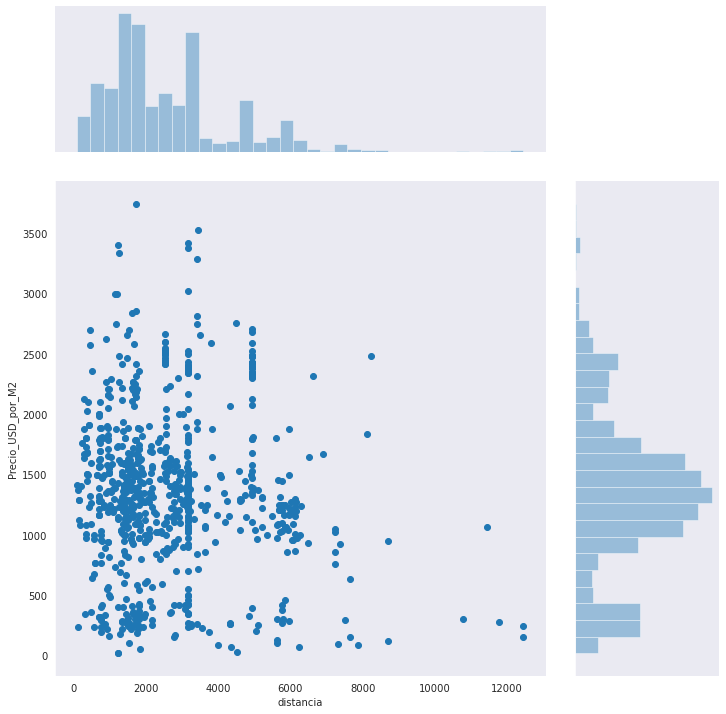

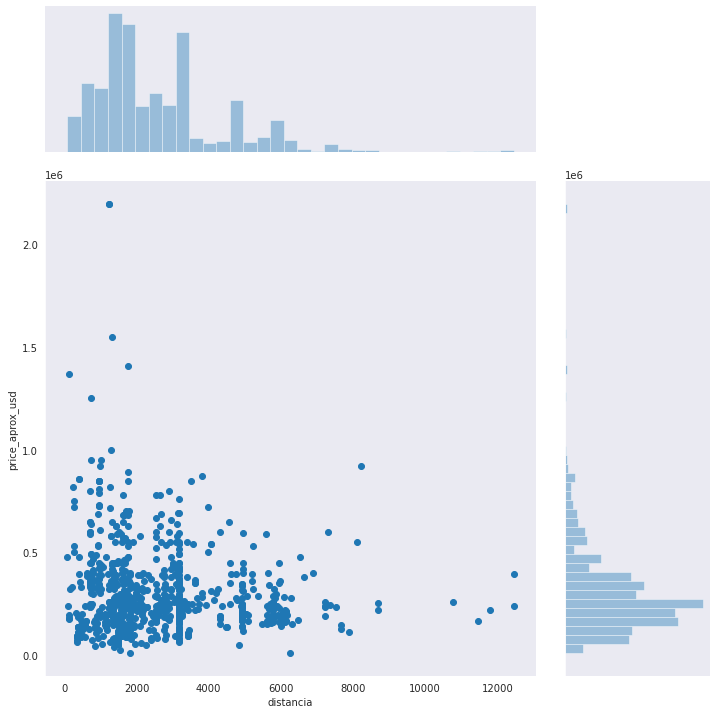

In [38]:
with sns.axes_style('dark'):
    g =sns.jointplot( x=distancia_graf, y=Precio_USD_por_M2 , height=10, ratio=3 )
    f= sns.jointplot( x=distancia_graf, y=price_aprox_usd , height=10, ratio=3 )

### Gráfico de quantiles

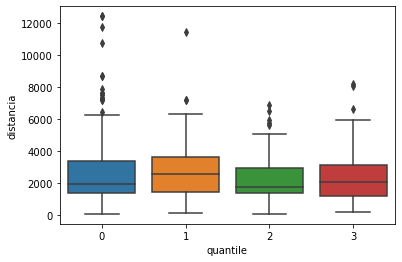

In [40]:
Quantile1 = np.around(df_ppc_latlon_con_precio['quantile'])
bx = sns.boxplot(x = Quantile1, y = distancia1)

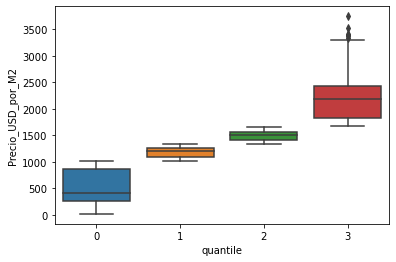

In [41]:
ax = sns.boxplot(x = Quantile1, y = Precio_USD_por_M21 )

### Gráfico de cercanía a la panamericana

In [32]:
basic_map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(-34.44349933885334, -58.86776001513485), zoom=12)

icono_puente = Icon(icon_url='http://localhost:8888/files/TrabajoPractico1/icono_puente.png?_xsrf=2%7C2ca70c0c%7C8e467d878f5d4b68523c5f2b28ba085b%7C1607985927', icon_size=[28, 28])

icon0 = AwesomeIcon(
    name='home',
    marker_color='green',
    icon_color='black',
    spin=False
)

icon1 = AwesomeIcon(
    name='home',
    marker_color='beige',
    icon_color='black',
    spin=False
)

icon2 = AwesomeIcon(
    name='home',
    marker_color='orange',
    icon_color='black',
    spin=False
)

icon3 = AwesomeIcon(
    name='home',
    marker_color='red',
    icon_color='black',
    spin=False
)

for index, row in puentes_pilar.iterrows():
    marker = Marker(location=(row['Latitud'],row['Longitud']), draggable=False, icon=icono_puente)
    basic_map.add_layer(marker);

df_final_countries[['lat','lon','quantile']].apply(lambda x: marca_propiedad(x['lat'],x['lon'],x['quantile']),axis=1)
basic_map.add_control(FullScreenControl())

display(basic_map)

Map(center=[-34.44349933885334, -58.86776001513485], controls=(ZoomControl(options=['position', 'zoom_in_text'…